In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
train = pd.read_csv('train_Loan_Pred.csv')
test = pd.read_csv('test_Loan_Pred.csv')
sample = pd.read_csv('sample_submission_Loan_Pred.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

Numerical features: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train.shape , test.shape

((614, 13), (367, 12))

In [8]:
train_original=train.copy()
test_original=test.copy()

In [9]:
#Check whether train dataset is having the new column added
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**The Categorical columns having Null values are 1.Gender 2.Married 3.Dependents 4. Self Employed**

**The Numerical columns having Null values are 1. Loan Amount 2. Loan_amount_term 3.Credit_History**

In [11]:
train['Loan_Status'].value_counts(dropna=False, normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

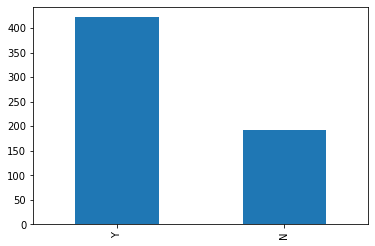

In [12]:
train['Loan_Status'].value_counts().plot.bar()

**We can infer from the train data that the loan for 422(around 69%) people out of 614 were approved**

### Categorical Data Analysis

In [13]:
train['Gender'].value_counts(dropna=False, normalize=True)

Male      0.796417
Female    0.182410
NaN       0.021173
Name: Gender, dtype: float64

In [14]:
import warnings
warnings.filterwarnings("ignore")

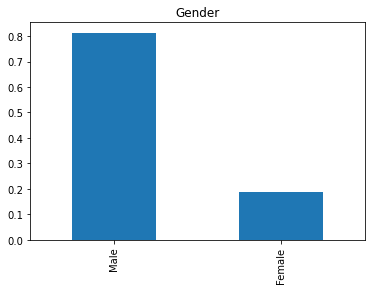

In [15]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

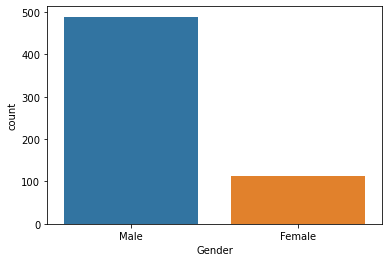

In [16]:
sns.countplot(train['Gender'])

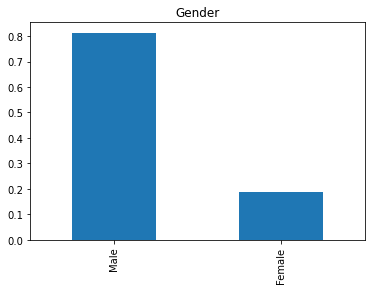

In [17]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()

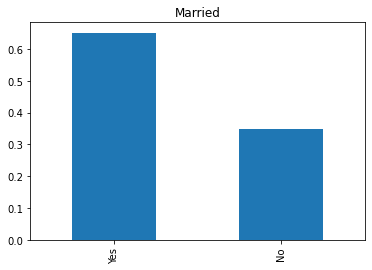

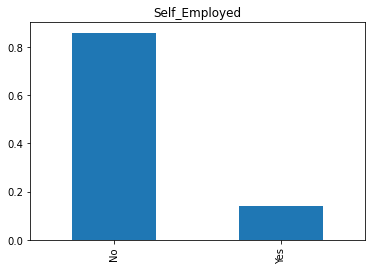

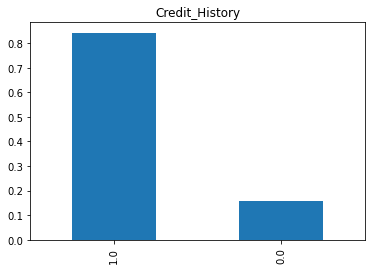

In [18]:
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

It can be inferred from the above bar plots that:

**80% of applicants in the dataset are male.**

**Approx 65% of the applicants in the dataset are married.**

**Approx 15% of applicants in the dataset are self-employed.**

**Approx 85% of applicants are having good credit history**

In [19]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### Independent Variables - Ordinal Data Analysis

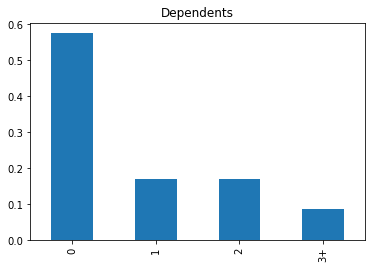

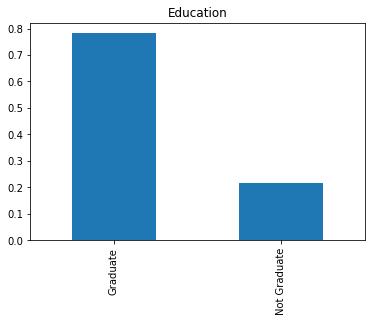

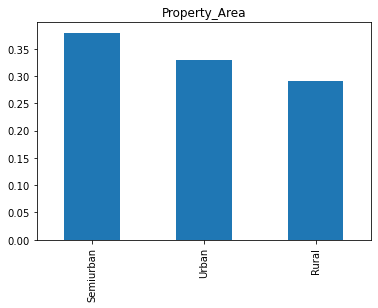

In [20]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

The following inferences can be made from the above bar plots:

**Most of the applicants don't have any dependents.**

**Around 80% of the applicants are Graduate.**

**Most of the applicants are from the Semiurban area.**

### Independent Variables -  Numerical Data Analysis

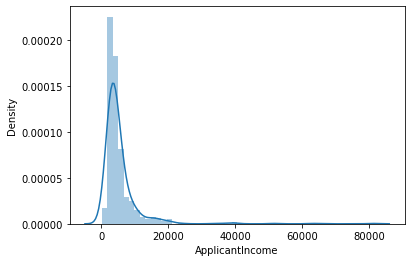

In [21]:
sns.distplot(train['ApplicantIncome'])
plt.show()

It can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed. We will try to make it normal in later sections as algorithms work better if the data is normally distributed.

<AxesSubplot:>

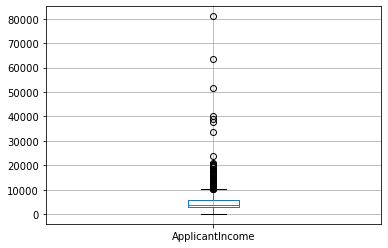

In [22]:
train.boxplot(column='ApplicantIncome')

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education

Text(0.5, 0.98, '')

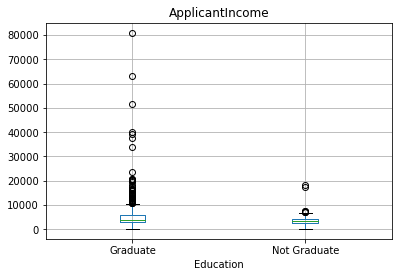

In [23]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers

### Checking Co-applicant income distribution

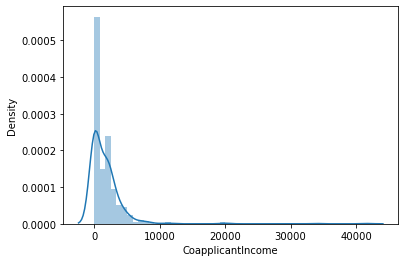

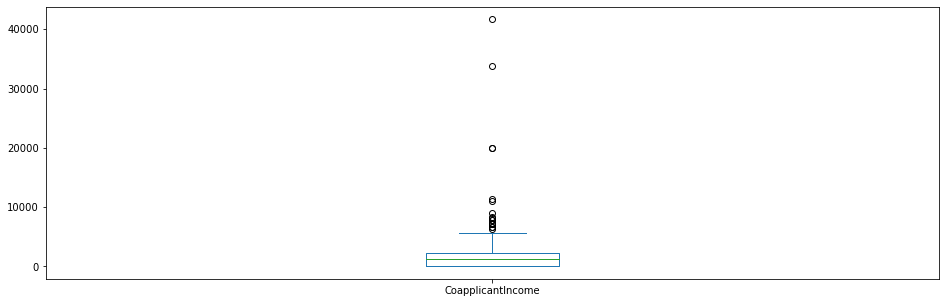

In [24]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

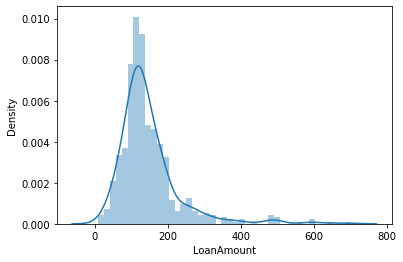

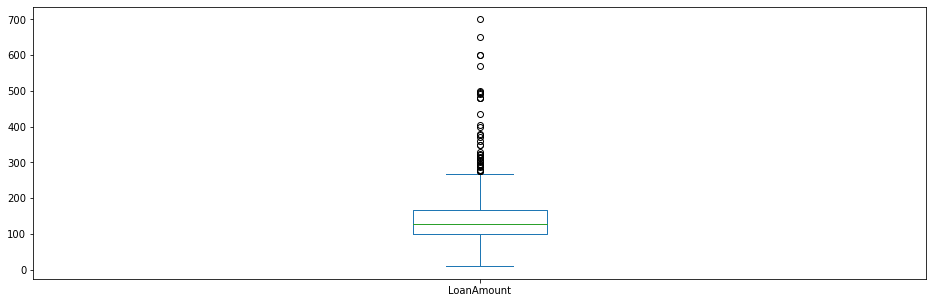

In [25]:
train.notna()
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

Bivariate Analysis:-
some of the hypotheses:-

a) Applicants with high incomes should have more chances of loan approval.

b) Applicants who have repaid their previous debts should have higher chances of loan approval.

c) Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.

d) Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

e) Let’s try to test the above-mentioned hypotheses using bivariate analysis.

f) After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

### Categorical Independent Variable vs Target Variable

First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans

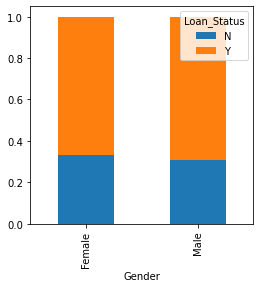

In [26]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

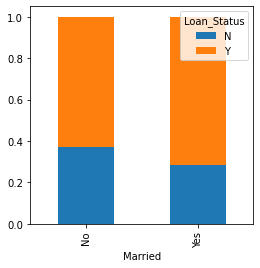

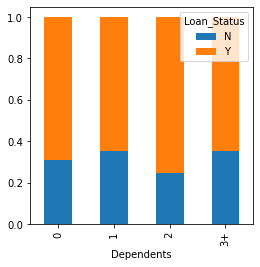

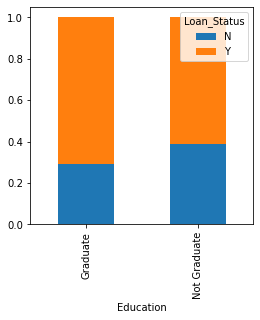

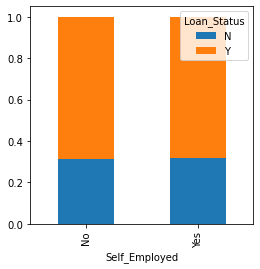

In [27]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

The proportion of married applicants is higher for approved loans.
Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

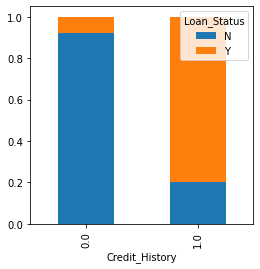

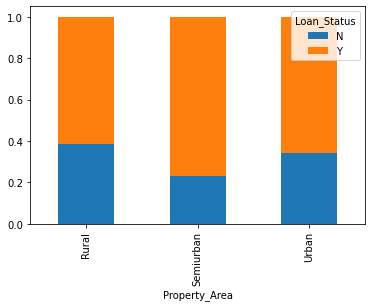

In [28]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

It seems people with a credit history as 1 are more likely to get their loans approved.
The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.
Now let’s visualize numerical independent variables with respect to the target variable.

### Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

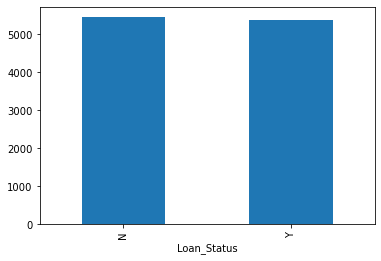

In [29]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income.

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

###  CORRELATION BETWEEN ALL THE NUMERICAL VARIABLES

<AxesSubplot:>

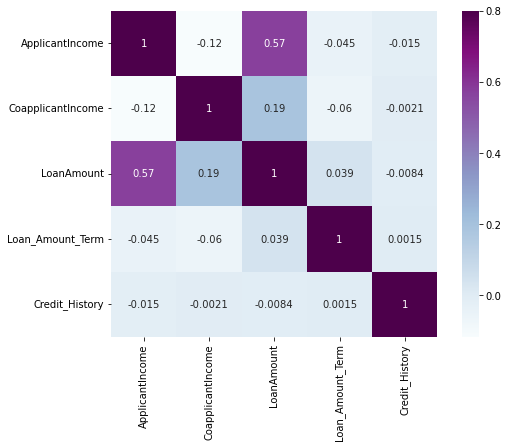

In [30]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

We see that the most correlate variables are (ApplicantIncome — LoanAmount) and (Credit_History — Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

In [31]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### REPLACING THE CATEGORICAL VALUES

In [32]:
#CONVERTING STRING VALUES(CATEGORICAL VALUES) TO INTEGER

train.Gender=train.Gender.map({"Female":0,"Male":1})
train.Married=train.Married.map({"No":0,"Yes":1})
train.Self_Employed=train.Self_Employed.map({"No":0,"Yes":1})
train.Education=train.Education.map({"Not":1,"Graduate":0})
train.Property_Area=train.Property_Area.map({"Urban":0,"Rural":1})
train.Loan_Status=train.Loan_Status.map({"N":0,"Y":1})
train.Dependents=train.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

test.Gender=test.Gender.map({"Female":0,"Male":1})
test.Married=test.Married.map({"No":0,"Yes":1})
test.Self_Employed=test.Self_Employed.map({"No":0,"Yes":1})
test.Education=test.Education.map({"Not":1,"Graduate":0})
test.Property_Area=test.Property_Area.map({"Urban":0,"Rural":1})
test.Dependents=test.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

In [33]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,0.0,1
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0,0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0,1
3,LP001006,1.0,1.0,0.0,NaN,0.0,2583,2358.0,120.0,360.0,1.0,0.0,1
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0,1


### Filling missing Values

In [34]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
train["Education"].fillna(train["Education"].mode()[0],inplace=True)
train["Property_Area"].fillna(train["Property_Area"].mode()[0],inplace=True)

In [35]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [37]:
#FILLING THE NULL VALUES USING THE MEDIAN IN LOANAMOUNT
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [38]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,0.0,1
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,1.0,0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,0.0,1
3,LP001006,1.0,1.0,0.0,0.0,0.0,2583,2358.0,120.0,360.0,1.0,0.0,1
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,0.0,1


### FILLING MISSING VALUES IN TEST DATA

In [40]:
test.isnull().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education             84
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area        116
dtype: int64

In [41]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test["Married"].fillna(test["Married"].mode()[0],inplace=True)
test["Dependents"].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["Education"].fillna(test["Education"].mode()[0],inplace=True)
test["Property_Area"].fillna(test["Property_Area"].mode()[0],inplace=True)

In [42]:
test["Loan_Amount_Term"].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [43]:
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)

In [44]:
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

In [45]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [46]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,0.0,0.0,5720,0,110.0,360.0,1.0,0.0
1,LP001022,1.0,1,1.0,0.0,0.0,3076,1500,126.0,360.0,1.0,0.0
2,LP001031,1.0,1,2.0,0.0,0.0,5000,1800,208.0,360.0,1.0,0.0
3,LP001035,1.0,1,2.0,0.0,0.0,2340,2546,100.0,360.0,1.0,0.0
4,LP001051,1.0,0,0.0,0.0,0.0,3276,0,78.0,360.0,1.0,0.0


### Model Building - Logistic Regression

In [47]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [48]:
x=train.drop("Loan_Status",1)
y=train.Loan_Status

In [49]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [51]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
pred_l=logmodel.predict(x_test)
acc_l=accuracy_score(y_test,pred_l)*100
acc_l

82.70270270270271

In [67]:
pred_test=logmodel.predict(test)

In [53]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [54]:
submissioncsv=pd.DataFrame({"Loan_ID":test_original["Loan_ID"],"Loan_Status":pred_test})

In [55]:
submissioncsv

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [56]:
submissioncsv["Loan_Status"].replace(0,"N",inplace=True)
submissioncsv["Loan_Status"].replace(1,"Y",inplace=True)

In [57]:
submissioncsv

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [60]:
pd.DataFrame(submissioncsv, columns=['Loan_ID','Loan_Status']).to_csv('Loan_pred_output.csv')